# Aprendizaje no Automático
* Sistemas expertos, por ejemplo los _score cards_ usados para otorgar créditos antes de uso masivo de las computadoras.
* Para esta semana, analizaremos las técnicas de aprendizaje computacional desde la perspectiva del riesgo crediticio.
* Aprenderemos a crear un clasificador de riesgo crediticio, que **aprenda** a otorgar una calificación dado que recibe cierta información de un cliente.

Tomemos por ejemplo los datos de [https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)](https://archive.ics.uci.edu/ml/datasets/Statlog+\(German+Credit+Data\)).  Exploremos su contenido:


In [1]:
!head data/german.data

A11 6 A34 A43 1169 A65 A75 4 A93 A101 4 A121 67 A143 A152 2 A173 1 A192 A201 1
A12 48 A32 A43 5951 A61 A73 2 A92 A101 2 A121 22 A143 A152 1 A173 1 A191 A201 2
A14 12 A34 A46 2096 A61 A74 2 A93 A101 3 A121 49 A143 A152 1 A172 2 A191 A201 1
A11 42 A32 A42 7882 A61 A74 2 A93 A103 4 A122 45 A143 A153 1 A173 2 A191 A201 1
A11 24 A33 A40 4870 A61 A73 3 A93 A101 4 A124 53 A143 A153 2 A173 2 A191 A201 2
A14 36 A32 A46 9055 A65 A73 2 A93 A101 4 A124 35 A143 A153 1 A172 2 A192 A201 1
A14 24 A32 A42 2835 A63 A75 3 A93 A101 4 A122 53 A143 A152 1 A173 1 A191 A201 1
A12 36 A32 A41 6948 A61 A73 2 A93 A101 2 A123 35 A143 A151 1 A174 1 A192 A201 1
A14 12 A32 A43 3059 A64 A74 2 A91 A101 4 A121 61 A143 A152 1 A172 1 A191 A201 1
A12 30 A34 A40 5234 A61 A71 4 A94 A101 2 A123 28 A143 A152 2 A174 1 A191 A201 2


* ¿Qué significan todas estas claves?
* ¿Qué hacemos cuando tenemos este tipo de datos?
* ¿Se pueden usar histogramas?

La descripción de los datos viene en el archivo `data/german.doc`

In [2]:
!head data/german.doc

Description of the German credit dataset.

1. Title: German Credit data

2. Source Information

Professor Dr. Hans Hofmann  
Institut f"ur Statistik und "Okonometrie  
Universit"at Hamburg  
FB Wirtschaftswissenschaften  


**Por favor, leánla en detalle al finalizar la sesión.**

## Score cards  
**¿Cómo comenzamos a usar la información contenida en los datos?**  
* Necesitamos saber qué significa cada columna,  
* Ponerlos en un formato analizable,  
* Comenzar a hacer algunos histogramas,  

**Por ahora yo hice un trabajo previo para ponerles nombres a las columnas, y estructurarlos de forma que no sean útiles. Es tarea para ustedes hacer su propio script que tome el archivo original y lo convierta en en un archivo similar al siguiente:**

In [3]:
!head data/german.data.all-numeric.csv

"checking_acc_numeric","time_credit_acc","credit_history_numeric","purpose_numeric","amount","savings_acc_numeric","p_employment_time_numeric","installment_rate","marita_status_sex_numeric","other_debtors_numeric","p_residence_time","property_numeric","age","other_installment_numeric","housing_numeric","number_of_credits","job_numeric","dependants","has_phone_numeric","foreign_worker_numeric","is_good"
1,6,3,1,1169,0,5,4,1,1,4,4,67,0,1,2,3,1,1,1,1
2,48,4,1,5951,1,3,2,2,1,2,4,22,0,1,1,3,1,0,1,2
4,12,3,6,2096,1,4,2,1,1,3,4,49,0,1,1,2,2,0,1,1
1,42,4,3,7882,1,4,2,1,2,4,3,45,0,0,1,3,2,0,1,1
1,24,2,2,4870,1,3,3,1,1,4,0,53,0,0,2,3,2,0,1,2
4,36,4,6,9055,0,3,2,1,1,4,0,35,0,0,1,2,2,1,1,1
4,24,4,3,2835,3,5,3,1,1,4,3,53,0,1,1,3,1,0,1,1
2,36,4,4,6948,1,3,2,1,1,2,2,35,0,2,1,4,1,1,1,1
4,12,4,1,3059,4,4,2,4,1,4,4,61,0,1,1,2,1,0,1,1


Por supuesto, ustedes prefieren usar `pandas` para visualizarlos. 

In [4]:
from pandas import read_csv as read_csv, DataFrame
df = read_csv('data/german.data.all-numeric.csv',header=0)
df.head(n=10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
0,1,6,3,1,1169,0,5,4,1,1,...,4,67,0,1,2,3,1,1,1,1
1,2,48,4,1,5951,1,3,2,2,1,...,4,22,0,1,1,3,1,0,1,2
2,4,12,3,6,2096,1,4,2,1,1,...,4,49,0,1,1,2,2,0,1,1
3,1,42,4,3,7882,1,4,2,1,2,...,3,45,0,0,1,3,2,0,1,1
4,1,24,2,2,4870,1,3,3,1,1,...,0,53,0,0,2,3,2,0,1,2
5,4,36,4,6,9055,0,3,2,1,1,...,0,35,0,0,1,2,2,1,1,1
6,4,24,4,3,2835,3,5,3,1,1,...,3,53,0,1,1,3,1,0,1,1
7,2,36,4,4,6948,1,3,2,1,1,...,2,35,0,2,1,4,1,1,1,1
8,4,12,4,1,3059,4,4,2,4,1,...,4,61,0,1,1,2,1,0,1,1
9,2,30,3,2,5234,1,1,4,3,1,...,2,28,0,1,2,4,1,0,1,2


In [5]:
df.describe()

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,3.224000,2.975000,3271.258000,1.190000,3.384000,2.973000,1.644000,1.134000,...,2.488000,35.546000,0.325000,1.071000,1.407000,2.904000,1.155000,0.404000,0.963000,1.300000
std,1.257638,12.058814,1.060636,2.081035,2822.736876,0.966869,1.208306,1.118715,0.844972,0.445244,...,1.318937,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.000000,1.000000,250.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,12.000000,3.000000,1.000000,1365.500000,1.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,27.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,18.000000,4.000000,2.000000,2319.500000,1.000000,3.000000,3.000000,1.000000,1.000000,...,3.000000,33.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,4.000000,3972.250000,1.000000,5.000000,4.000000,2.000000,1.000000,...,4.000000,42.000000,0.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,4.000000,72.000000,4.000000,11.000000,18424.000000,4.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,75.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000


En este caso se tienen 20 columnas de características o discriminadores (_features_), y una columna de salida o clasificación. Tomemos sólo 4 de las 20 características para ilustrar el proceso de creación de un _score card_. En este caso tomaremos:  
* `time_credit_acc`
* `amount`
* `p_employment_time_numeric`
* `age`  
También debemos dividir nuestra muestra en dos secciones, una que no servirá para ***entrenar*** nuestro modelo; y otra que nos servira para ***evaluar*** su desempeño. En este caso tomamos aleatoriamente el 70% de la mustra original para entrenamiento, y dejamos el 30% restante para evaluación.

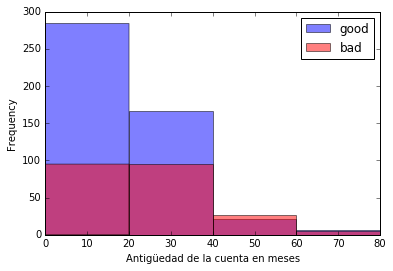

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure();
tca_range = range(0,100,20)
df_trainning = df.sample(frac=0.7, replace=False, random_state=1234)
df_testing = df.drop(df_trainning.index)
df_good = df_trainning[df_trainning['is_good']==1] 
df_bad = df_trainning[df_trainning['is_good']!=1]
df_good['time_credit_acc'].plot.hist(bins=tca_range,color='b',alpha=0.5,label='good')
df_bad['time_credit_acc'].plot.hist(bins=tca_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Antigüedad de la cuenta en meses')

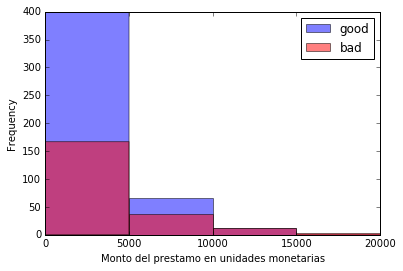

In [7]:
amount_range = range(0,25000,5000)
df_good['amount'].plot.hist(bins=amount_range,color='b',alpha=0.5,label='good')
df_bad['amount'].plot.hist(bins=amount_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Monto del prestamo en unidades monetarias')

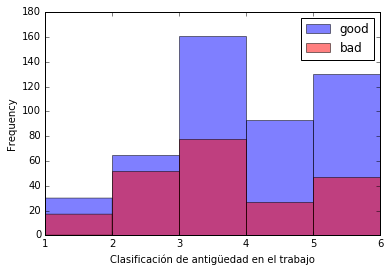

In [8]:
pet_range = range(1,7,1)
df_good['p_employment_time_numeric'].plot.hist(bins=pet_range,color='b',alpha=0.5,label='good')
df_bad['p_employment_time_numeric'].plot.hist(bins=pet_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Clasificación de antigüedad en el trabajo')

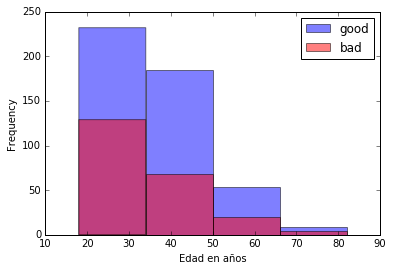

In [9]:
age_range = range(18,88,16)
df_good['age'].plot.hist(bins=age_range,color='b',alpha=0.5,label='good')
df_bad['age'].plot.hist(bins=age_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper right')
plt.xlabel('Edad en años')

### Creando el _score card_

Para crear un _score card_ debemos segmentar las variables de interés en unpos pocos grupos, **3** o **4**, por ejemplo, y a cada grupo asignarle una calificación ***intuitiva***, respetando que las calificaciones mayores significan menor riesgo (o mayor, sgún nos guste).

| TCA  | Score |Amount| Score | PET  | Score | Age  | Score |
|------|-------|------|-------|------|-------|------|-------|
| 0-20 |   7   | 0-5K |   7   |   1  |    1  | 18-34|   3   |
|20-40 |   3   | 5-10K|   1   |   2  |    1  | 34-50|   5   |
|40-60 |   0   |10-15K|   0   |   3  |    6  | 50-66|   3   |
|60-80 |   0   |15-20K|   0   |   4  |    8  | 66-83|   3   |
| ---- | ----- | ---- | ----- |   5  |    8  | ---- | ----- |

Por supuesto, queremos un programa que reciba la información de uno o varios clientes y nos devuelva la calificación que debería recibir según nuestro **primer modelo de clasificación**. Veamos su desempeño.  
En el directorio de esta semana, se encuentra el archivo `score_card.py`, es una implementación de la tabla que describe nuestro _score card_. Ahora debemos evaluar su desempeño. Para hacerlo, usamos la muestra de prueba que seleccionamos anteriormente.
Para ejecutar nuestro programa, y evaluar un cliente, simplemente ejecutamos:

In [10]:
!./score_card.py --tca=1 --amount=2000 --pet=4 --age=36

27


Ahora, debemos usar nuestro script para evaluar a cada uno de nuestros clientes en la muestra de prueba.

In [11]:
df_testing.describe()

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,property_numeric,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.573333,20.060000,3.303333,3.013333,3207.386667,1.200000,3.403333,3.006667,1.636667,1.123333,...,2.480000,35.513333,0.280000,1.063333,1.390000,2.893333,1.163333,0.416667,0.963333,1.263333
std,1.271486,11.509908,0.980404,2.127968,2829.494911,0.946742,1.191099,1.118388,0.844808,0.426688,...,1.276073,11.121245,0.660597,0.523037,0.570659,0.640304,0.370287,0.493830,0.188256,0.441178
min,1.000000,4.000000,0.000000,1.000000,362.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,12.000000,3.000000,1.000000,1391.250000,1.000000,3.000000,2.000000,1.000000,1.000000,...,2.000000,27.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
50%,2.000000,18.000000,4.000000,2.000000,2160.000000,1.000000,3.000000,3.000000,1.000000,1.000000,...,2.000000,33.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,1.000000
75%,4.000000,24.000000,4.000000,4.000000,3891.250000,1.000000,5.000000,4.000000,2.000000,1.000000,...,4.000000,42.000000,0.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,2.000000
max,4.000000,60.000000,4.000000,11.000000,15857.000000,4.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,74.000000,2.000000,2.000000,4.000000,4.000000,2.000000,1.000000,1.000000,2.000000


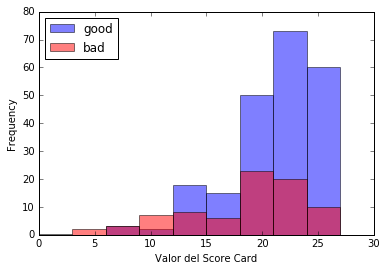

In [12]:
from score_card import score_card
scores = []
for row in df_testing.iterrows():
    row = row[1]
    tca = row['time_credit_acc']
    amount = row['amount']
    pet = row['p_employment_time_numeric']
    age = row['age']
    scores.append(score_card(tca=tca, amount=amount, pet=pet, age=age))
df_testing['score_card'] = scores   
score_card_range = range(0,30,3)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['score_card'].plot.hist(bins=score_card_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['score_card'].plot.hist(bins=score_card_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Score Card')

Cualitativamente se puede ver que los valores grandes de nuestro score, seleccionan a los clientes de menor riesgo. Sin embargo, necesitamos un método cuantitativo para seleccionar el punto óptimo en el cual debemos **cortar** la muestra de clientes que quisiéramos aceptar. Por ejemplo, quisiéramos optimizar con respecto a dos criterios:  
* Queremos que nuestra muestra tenga el menor riesgo posible.
* Queremos que sea lo más numerosa posible.  
Empecemos por calcular la ***probabilidad  de impago por bin***, y la ***probabilidad de que un cliente arbitrario caiga dentro de un bin***.

#### Probabilidad de impago por bin

In [13]:
from pandas import cut
htest_good = cut(df_good['score_card'], bins=score_card_range)
htest_bad = cut(df_bad['score_card'], bins=score_card_range)
htest_bad.value_counts()

(18, 21]    20
(15, 18]    17
(24, 27]    10
(21, 24]    10
(9, 12]      9
(12, 15]     7
(6, 9]       4
(3, 6]       2
(0, 3]       0
dtype: int64

In [14]:
htest_good.value_counts()

(24, 27]    60
(18, 21]    51
(21, 24]    48
(15, 18]    35
(12, 15]    21
(6, 9]       4
(9, 12]      2
(3, 6]       0
(0, 3]       0
dtype: int64

In [15]:
purity_by_bin = []
for g in range(0,len(htest_good.value_counts())):
    sum_g_b = htest_good.value_counts()[g] + htest_bad.value_counts()[g]
    if sum_g_b !=0:
        purity_by_bin.append(1.0*htest_good.value_counts()[g]/sum_g_b)
    else:
        purity_by_bin.append(1.0*htest_good.value_counts()[g])    

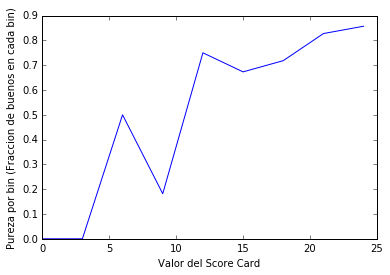

In [16]:
plt.plot(score_card_range[:(len(purity_by_bin))], purity_by_bin, 'b')
plt.xlabel('Valor del Score Card')
plt.ylabel('Pureza por bin (Fraccion de buenos en cada bin)')

In [17]:
efficiency_by_bin = []
for g in range(0,len(htest_good.value_counts())):
    sum_g_b = htest_good.value_counts()[g] + htest_bad.value_counts()[g]
    efficiency_by_bin.append(1.0*sum_g_b/(htest_good.size+htest_bad.size))

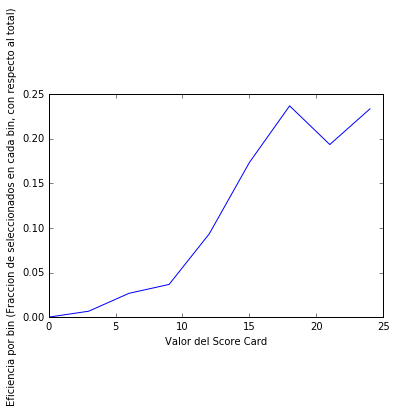

In [18]:
plt.plot(score_card_range[:(len(efficiency_by_bin))], efficiency_by_bin, 'b')
plt.xlabel('Valor del Score Card')
plt.ylabel('Eficiencia por bin (Fraccion de seleccionados en cada bin, con respecto al total)')

##### En este caso se ve relativamente claro, que los bins de menor riesgo son los que tienen un valor más alto del score card. Es decir se pueden disminuir costos disminuyendo el riesgo de impago. Sin embargo, también tiene un costo rechazar clientes buenos con un riesgo un poco mayor. Para saber en qué punto debemos hacer el corte mínimo de nuestro score, debemos determinar la función que debemos optimizar.

En este caso, la función que debemos optimizar es la utilidad generada por los préstamos otorgados, tomando en cuenta todos los costos y todos los ingresos. Hagamos un ejemplo ***de juguete*** para ejemplificarlo.


- Supongamos por ejemplo que gastamos **\$500000** para conseguir **1200** prospectos de clientes.  
- Que el tamaño del préstamo promedio es de **\$6000 **
- Que un cliente que paga su préstamo en su totalidad, paga en promedio 20% de intereses
- Que si un cliente entra en default, ocasiona una pérdida promedio de **\$3000**, es decir paga sólo la mitad de su deuda.
- Que un cliente que sólo paga parcialmente su préstamo, paga en promedio 40% de intereses sobre el monto que sí paga.

### La Pregunta es: ¿Cuál es el score mínimo que debemos escoger para maximizar la utilidad?

El costo por bin del default es entonces:
$$ DC_{bin} = N * E_{bin} * D_{bin} * L_{bin},$$  
donde $L_{bin} = 3000$ es el pérdida esperada promedio en cada bin (en este caso constante),  $D_{bin}$ es el default esperado por bin, $E_{bin}$ es la eficiencia por bin (fraccción de clientes aceptados por bin), y $N=1000$ el número de prospectos esperados. 

El ingreso debido a los préstamos pagados totalmente será:
$$ RT_{bin} = N * E_{bin} * ( 1 - D_{bin} ) * S_{bin} * ( IT_{bin}),$$
mientras que el ingreso por los préstamos pagados parcialmente será:
$$ RP_{bin} = N * E_{bin} *D_{bin} * (S_{bin} - L_{bin}) * ( IP_{bin} ), $$
donde $S_{bin}$ es el tamaño promedio del préstamo por bin (constante), y $IT_{bin}, IP_{bin}$ son los intereses pagados por los clientes que pagan en su totalidad y parcialmente, respectivamente.

Entonces, nuestra función a maximizar es:
$$ f = \sum_{bin}(RT_{bin} + RP_{bin} - DC_{bin}) - MKT,$$
donde $MKT$ es el costo de marketing por atraer los N prospectos.

Veamos su apariencia:

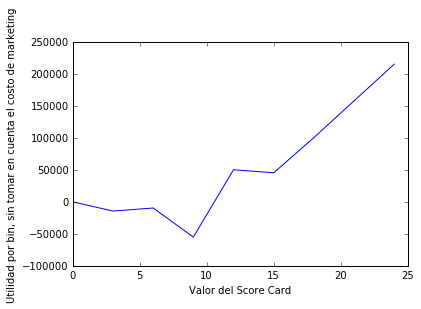

In [19]:
from numpy import array, cumsum
N = 1200
MKT = 500000
S_bin = 6000
L_bin = 3000
IT_bin = 0.20
IP_bin = 0.40
purity_by_bin = array(purity_by_bin)
default_by_bin = -1*(purity_by_bin - 1.0)
efficiency_by_bin = array(efficiency_by_bin)
DC_bin = N * efficiency_by_bin * default_by_bin * L_bin
RT_bin = N * efficiency_by_bin * purity_by_bin * S_bin * IT_bin
RP_bin = N * efficiency_by_bin * default_by_bin * (S_bin - L_bin) * IP_bin
f_bin = RT_bin + RP_bin - DC_bin
plt.plot(score_card_range[:(len(f_bin))], f_bin, 'b')
plt.xlabel('Valor del Score Card')
plt.ylabel('Utilidad por bin, sin tomar en cuenta el costo de marketing')

Ahora, la suma que tenemos indicada para definir $f$ requiere un poco de explicación. Usualmente pensaríamos que deberíamos sumar desde el bin con menor índice, sin embargo ese índice es arbitrario. El orden de la suma está impuesto por el siguiente criterio:

* Definimos si aceptaremos a los clientes que cumplen con tener mayor o menor calificación.
* En base a esto, localizamos el bin más restrictivo de nuestra selección. Por ejemplo, si, como en cunestro caso, los clientes menos riesgosos se agrupan en las calificaciones más grandes, el bin más restrictivo es el que contiene las mayores calificaciones.
* Acumulamos todos los clientes desde el bin más restrictivo, y vamos añadiendo nuevos bins, el más restrictivo de los restantes.
* Al finalizar este proceso, restamos el costo de marketing (también se pueden restar los costos de operación).
* Localizamos el punto en el que se maximiza la función, ese es el corte que deberíamos escojer, porque es el que maimiza las utilidades.

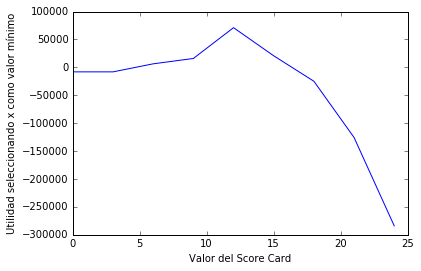

In [20]:
f = cumsum(f_bin[::-1])[::-1] - MKT
plt.plot(score_card_range[:(len(f))], f, 'b')
plt.xlabel('Valor del Score Card')
plt.ylabel('Utilidad seleccionando x como valor mínimo')

### ¿Cómo evaluamos que tan robusto es nuestro modelo?
### Bootrsapping

* Hacemos N variaciones aleatorias de nuestra muestra de prueba
* Reevaluamos la utilidad (o función a maximizar (minimizar)) para cada una de las N nuevas muestras
* Usamos alguna medida de dispersión para estimar alguna variación esperada, por ejemplo la desviación estándar.

In [21]:
def bootstrapped_utility():
    df_bs = df_testing.sample(frac=1, replace=True)
    df_bs_good = df_bs[df_bs['is_good']==1] 
    df_bs_bad = df_bs[df_bs['is_good']!=1]
    hbs_good = cut(df_bs_good['score_card'], bins=score_card_range)
    hbs_bad = cut(df_bs_bad['score_card'], bins=score_card_range)
    bs_purity_by_bin = []
    bs_efficiency_by_bin = []
    for g in range(0,len(hbs_good.value_counts())):
        sum_g_b = hbs_good.value_counts()[g] + hbs_bad.value_counts()[g]
        if sum_g_b !=0:
            bs_purity_by_bin.append(1.0*hbs_good.value_counts()[g]/sum_g_b)
        else:
            bs_purity_by_bin.append(1.0*hbs_good.value_counts()[g])
        bs_efficiency_by_bin.append(1.0*sum_g_b/(hbs_good.size+hbs_bad.size))
    bs_purity_by_bin = array(bs_purity_by_bin)
    bs_default_by_bin = -1*(bs_purity_by_bin - 1.0)
    bs_efficiency_by_bin = array(bs_efficiency_by_bin)
    bs_DC_bin = N * bs_efficiency_by_bin * bs_default_by_bin * L_bin
    bs_RT_bin = N * bs_efficiency_by_bin * bs_purity_by_bin * S_bin * IT_bin
    bs_RP_bin = N * bs_efficiency_by_bin * bs_default_by_bin * (S_bin - L_bin) * IP_bin
    bs_f_bin = bs_RT_bin + bs_RP_bin - bs_DC_bin
    bs_f = cumsum(bs_f_bin[::-1])[::-1] - MKT 
    return bs_f

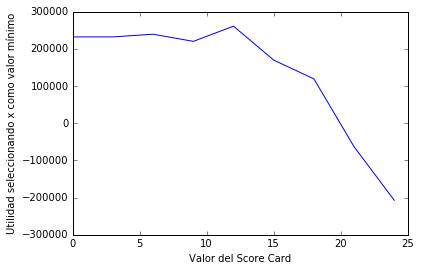

In [22]:
bs_f = bootstrapped_utility()
plt.plot(score_card_range[:(len(f))], bs_f, 'b')
plt.xlabel('Valor del Score Card')
plt.ylabel('Utilidad seleccionando x como valor mínimo')

In [23]:
bs_f = bootstrapped_utility()
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility()
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1,2,3,4,5,6,7,8
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-9440.000000,-9440.000000,3736.000000,13768.000000,71152.000000,21640.000000,-18128.000000,-120680.000000,-288584.000000
std,84290.061961,84290.061961,82667.452978,81675.013649,76238.843834,66467.326218,62252.113801,51765.485167,39718.419817
min,-212000.000000,-212000.000000,-180800.000000,-159200.000000,-84800.000000,-106400.000000,-164000.000000,-240800.000000,-375200.000000
25%,-59000.000000,-59000.000000,-56000.000000,-48800.000000,13600.000000,-29600.000000,-59000.000000,-156800.000000,-315800.000000
50%,-8000.000000,-8000.000000,-800.000000,10000.000000,70000.000000,23200.000000,-17600.000000,-128000.000000,-288800.000000
75%,52000.000000,52000.000000,60400.000000,59200.000000,119200.000000,64600.000000,31000.000000,-86600.000000,-264200.000000
max,208000.000000,208000.000000,215200.000000,196000.000000,241600.000000,184000.000000,112000.000000,-3200.000000,-156800.000000


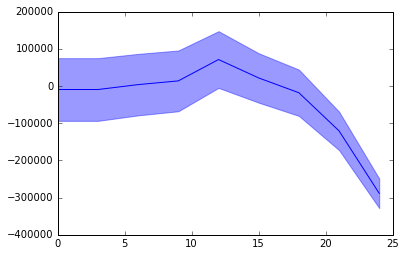

In [24]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(score_card_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(score_card_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')

**Conclusión**
A priori no parece un mal modelo, sin embargo no se ve muy robusto, y parece que no es improbable que las fluctuaciones estadísticas puedan generar pérdidas si se otorgan préstamos usando este _score card_.

# Aprendizaje Automático
## Método Naïve Bayesian
### Recordando el Teorema de Bayes

Para cada evento, tenemos un conjunto de características $\vec{x}$ con el cual queremos obtener la probabilidad de que ese evento pertenezca a la grupo $\color{blue}G$ o al grupo $\color{red}B$. Lo que podemos calcular usando los datos históricos, es la probabilidad de que el evento tenga características $\vec{x}$ dado que pertenece al grupo $\color{blue}G$:
$$ P(\vec{x}|{\color{blue}G})=\frac{P({\color{blue}G},\vec{x})}{P({\color{blue}G})}$$.
Para obtener la probabilidad de que un evento pertenezca a la grupo $\color{blue}G$ dado que tiene características $\vec{x}$ podemos usar:
$$ P({\color{blue}G}|\vec{x})=\frac{P(\vec{x},{\color{blue}G})}{P(\vec{x})}$$.
El teorema de Bayes nos dice que:  
$$
P(\vec{x},{\color{blue}G}) = P({\color{blue}G},\vec{x}),$$
$$
P(\vec{x}|{\color{blue}G})P({\color{blue}G}) = P({\color{blue}G}|\vec{x})P(\vec{x}),
$$
es decir, podemos obtener la probabilidad de que un evento pertenezca al grupo $\color{blue}G$ dado que tiene características $\vec{x}$, P({\color{blue}G}|\vec{x}), usando:
$$
P({\color{blue}G}|\vec{x})= \frac{P(\vec{x}|{\color{blue}G})P({\color{blue}G})}{P(\vec{x})}.
$$
De forma equivalente, podemos obtener la probabilidad de que un evento pertenezca al grupo $\color{red}B$ dado que tiene características $\vec{x}$, P({\color{blue}G}|\vec{x}), usando:
$$
P({\color{red}B}|\vec{x})= \frac{P(\vec{x}|{\color{red}B})P({\color{red}B})}{P(\vec{x})}.
$$

### Retomando nuestro ejemplo

Tomemos de nuevo el contexto del riesgo crediticio. Supongamos que tenemos un conjunto $A_{\color{blue}G}$, que es el conjunto de atributos que consideramos buenos, es decir, de clientes a los que les otorgamos el crédito que solicitan. $A_{\color{red}B}$ es el conjunto de atributos que consideramos malos, es decir el conjunto de atributos que tienen los clientes rechazados. Asumamos que un cliente en cuestión tiene características $\vec{x}$.  
* Si el cliente es en realidad buen cliente, pero lo rechazamos, tendremos una pérdida $L$.
* Si por el contrario, el cliente es malo, pero lo aceptamos, tendremos una pérdida $D$

**La suma de todas las pérdidas por rechazar clientes buenos es $L\sum_{\vec{x}\in {A_{\color{red}B}}}P(\vec{x}|{\color{blue}G})P({\color{blue}G})$**  
**La suma de todas las pérdidas por aceptar clientes malos es $D\sum_{\vec{x}\in {A_{\color{blue}G}}}P(\vec{x}|{\color{red}B})P({\color{red}B})$**  

**Nuestro objetivo es minimizar la suma de las pérdidas**
$$L\sum_{\vec{x}\in {A_{\color{red}B}}}P(\vec{x}|{\color{blue}G})P({\color{blue}G}) + D\sum_{\vec{x}\in {A_{\color{blue}G}}}P(\vec{x}|{\color{red}B})P({\color{red}B})$$.

Notemos que un cliente con características $\vec{x}$ no puede pertenecer simultaneamente al conjunto ${A_{\color{red}B}}$ y al conjunto ${A_{\color{blue}G}}$. Por lo tanto, para minimizar la suma, asignamos las caratcterísticas $\vec{x}$ al conjunto de los clientes buenos, ${A_{\color{blue}G}}$, si, y sólo si:
$$
D P(\vec{x}|{\color{red}B})P({\color{red}B})\leq L P(\vec{x}|{\color{blue}G})P({\color{blue}G}).
$$
Es decir, el conjunto ${A_{\color{blue}G}}$ está definido por:
$$
{A_{\color{blue}G}}=\{\vec{x}\ |\ D P(\vec{x}|{\color{red}B})P({\color{red}B})\leq L P(\vec{x}|{\color{blue}G})P({\color{blue}G})\},
$$
o bien:
$$
{A_{\color{blue}G}}=\left\{\vec{x}\ |\ \frac{D}{L} \leq \frac{P(\vec{x}|{\color{blue}G})P({\color{blue}G})}{P(\vec{x}|{\color{red}B})P({\color{red}B})}\right\}.
$$
Ahora sólo falta identificar cada uno de los términos involucrados en la desigualdad que define al conjunto de características de buenos clientes. En el caso más general, $D$ y $L$ pueden ser finciones de $\vec{x}$. En nuestro caso de juguete son constantes para todo $\vec{x}$.
* $D = \$3000 - \$3000 * 0.4$  
* $L = \$6000 * 0.2 $
* ¿Cómo obtenemos $\frac{P({\color{blue}G})}{P({\color{red}B})}$?
* ¿Cómo obtenemos $P(\vec{x}|{\color{blue}G})\ $ y $\ P(\vec{x}|{\color{red}B})$?

### Es equivalente a lo que hicimos en el _score card_.

* $\frac{P({\color{blue}G})}{P({\color{red}B})}$ es la proporción de buenos sobre la de malos.
* $P(\vec{x}|{\color{blue}G})\ $ y $\ P(\vec{x}|{\color{red}B})$ son los histogramas de las características $\vec{x}$

## Hagamos un modelo bayesiano con 7 variables.
Tomemos las variables 
* `checking_acc_numeric`
* `credit_history_numeric`
* `purpose_numeric`
* `amount`  
* `p_employment_time_numeric`
* `p_residence_time`
* `age`  

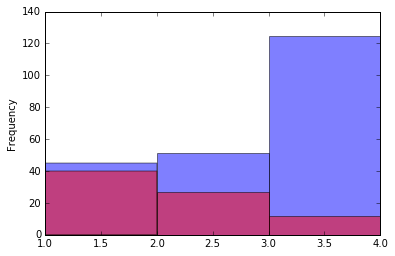

In [25]:
cac_min = df_good['checking_acc_numeric'].min()
cac_max = df_good['checking_acc_numeric'].max()
cac_range = range(cac_min,cac_max+1,1)
df_good['checking_acc_numeric'].plot.hist(bins=cac_range,color='b',alpha=0.5,label='good')
df_bad['checking_acc_numeric'].plot.hist(bins=cac_range,color='r',alpha=0.5,label='bad')

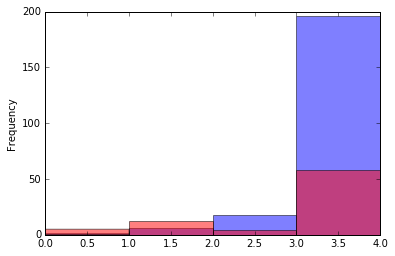

In [26]:
crh_min = df_good['credit_history_numeric'].min()
crh_max = df_good['credit_history_numeric'].max()
crh_range = range(crh_min,crh_max+1,1)
df_good['credit_history_numeric'].plot.hist(bins=crh_range,color='b',alpha=0.5,label='good')
df_bad['credit_history_numeric'].plot.hist(bins=crh_range,color='r',alpha=0.5,label='bad')

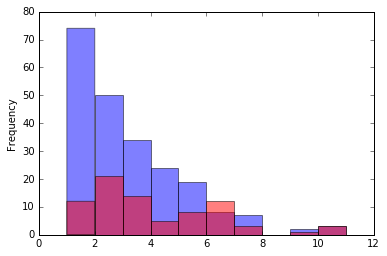

In [27]:
prp_min = df_good['purpose_numeric'].min()
prp_max = df_good['purpose_numeric'].max()
prp_range = range(prp_min,prp_max+1,1)
df_good['purpose_numeric'].plot.hist(bins=prp_range,color='b',alpha=0.5,label='good')
df_bad['purpose_numeric'].plot.hist(bins=prp_range,color='r',alpha=0.5,label='bad')

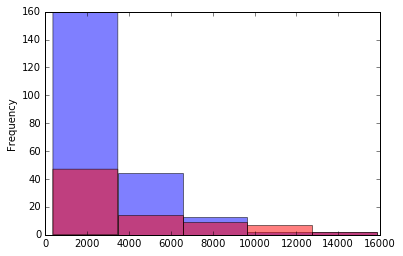

In [28]:
from numpy import arange
amt_min = df_good['amount'].min()
amt_max = df_good['amount'].max()
nbins = 5.0
binsize = 1.0 * (amt_max - amt_min) / nbins
amt_range = arange(amt_min,amt_max+binsize,binsize)
df_good['amount'].plot.hist(bins=amt_range,color='b',alpha=0.5,label='good')
df_bad['amount'].plot.hist(bins=amt_range,color='r',alpha=0.5,label='bad') 

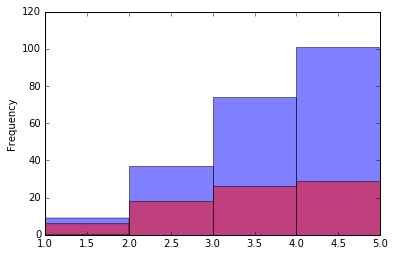

In [29]:
pet_min = df_good['p_employment_time_numeric'].min()
pet_max = df_good['p_employment_time_numeric'].max()
pet_range = range(pet_min,pet_max+1,1)
df_good['p_employment_time_numeric'].plot.hist(bins=pet_range,color='b',alpha=0.5,label='good')
df_bad['p_employment_time_numeric'].plot.hist(bins=pet_range,color='r',alpha=0.5,label='bad')

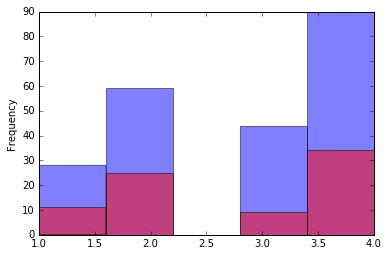

In [30]:
prt_min = df_good['p_residence_time'].min()
prt_max = df_good['p_residence_time'].max()
nbins = 5.0
binsize = 1.0 * (prt_max - prt_min) / nbins
prt_range = arange(prt_min,prt_max+binsize,binsize)
df_good['p_residence_time'].plot.hist(bins=prt_range,color='b',alpha=0.5,label='good')
df_bad['p_residence_time'].plot.hist(bins=prt_range,color='r',alpha=0.5,label='bad') 

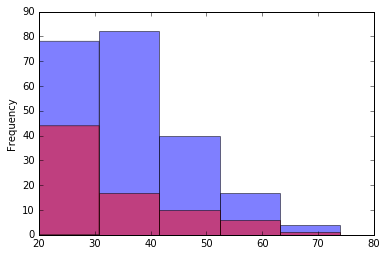

In [31]:
age_min = df_good['age'].min()
age_max = df_good['age'].max()
nbins = 5.0
binsize = 1.0 * (age_max - age_min) / nbins
age_range = arange(age_min,age_max+binsize,binsize)
df_good['age'].plot.hist(bins=age_range,color='b',alpha=0.5,label='good')
df_bad['age'].plot.hist(bins=age_range,color='r',alpha=0.5,label='bad') 